### MODELO KNN CONFORME EXEMPLO PASSADO EM AULA

In [2]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('german.csv', sep = ";")
data.head(5)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
target = data['Creditability']
dados = data.drop('Creditability', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dados, target, test_size=0.2, random_state=0)

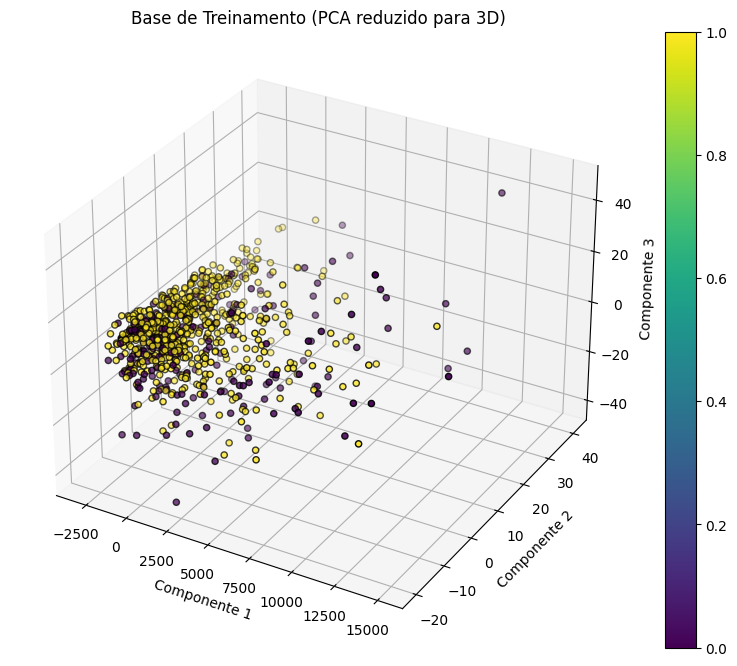

In [6]:
# Usando PCA para reduzir a dimensionalidade para 3 componentes principais
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Plotando o gráfico de dispersão 3D dos componentes principais
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', edgecolor='k')

# Adicionando rótulos aos eixos
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
ax.set_title("Base de Treinamento (PCA reduzido para 3D)")

# Adicionando uma barra de cores
plt.colorbar(scatter)

# Exibir gráfico
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.665


In [10]:
cm = confusion_matrix(y_test, y_pred)

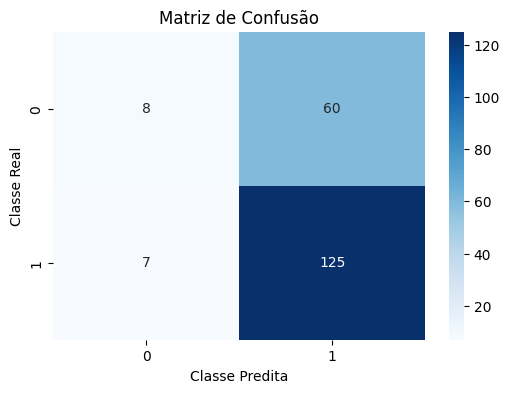

In [11]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

### REMOVENDO ALGUMAS FEATURES MANUALMENTE

In [12]:
columns_to_drop = ['Creditability', 'Duration_in_Current_address', 'No_of_dependents', 'Purpose', 'Type_of_apartment']
dados_2 = data.drop(columns_to_drop, axis=1)
target_2 = data['Creditability']

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dados_2, target_2, test_size=0.2, random_state=0)

In [14]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
y2_pred = knn2.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.66


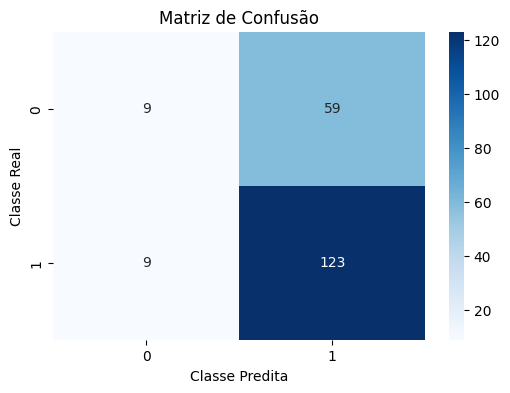

In [16]:
cm2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

### SELECTKBEST PARA SELEÇÃO DE CARACTERÍSTICAS E SMOTE PARA BALANCEAMENTO DOS DADOS

In [17]:
dados_3 = data.drop('Creditability', axis=1)
target_3 = data['Creditability']

Não é possível usar RFE com KNN, pois KNN não possui um atributo "coef" ou "feature_importance", que é utilizado pelo RFE para a seleção recursiva dos dados. Como alternativa usou-se o SelectKBest

In [18]:
X3_train, X3_test, y3_train, y3_test = train_test_split(dados_3, target_3, test_size=0.2, random_state=0)

# Aplique o SMOTE apenas no conjunto de treinamento
smote = SMOTE()
X3_train_smote, y3_train_smote = smote.fit_resample(X3_train, y3_train)

In [187]:
# Criar um pipeline que primeiro normaliza os dados e depois executa o KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=16)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Ajustar o modelo
pipeline.fit(X3_train_smote, y3_train_smote)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest(k=16)),
                ('knn', KNeighborsClassifier())])

In [188]:
mask = pipeline['selector'].get_support()
selected_features = dados_3.columns[mask]
print("Características selecionadas:")
print(selected_features)

Características selecionadas:
Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Sex_Marital_Status', 'Guarantors', 'Age_years', 'Concurrent_Credits',
       'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_Worker'],
      dtype='object')


In [189]:
y3_pred = pipeline.predict(X3_test)
accuracy3 = accuracy_score(y3_test, y3_pred)
print("Acurácia: ", accuracy3)

Acurácia:  0.735


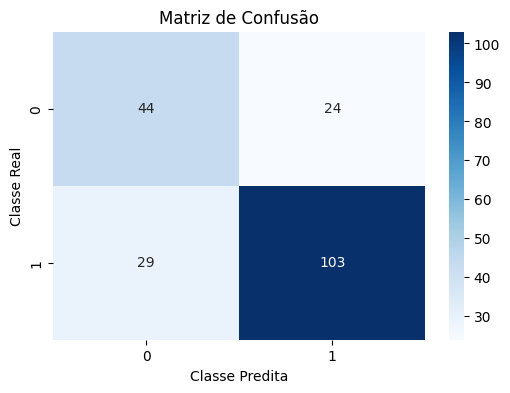

In [190]:
cm3 = confusion_matrix(y3_test, y3_pred)
# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

In [191]:
scores = cross_val_score(pipeline['knn'], X3_train_smote, y3_train_smote, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.6531725790246542
Desvio padrão da acurácia na validação cruzada: 0.016953930540083213


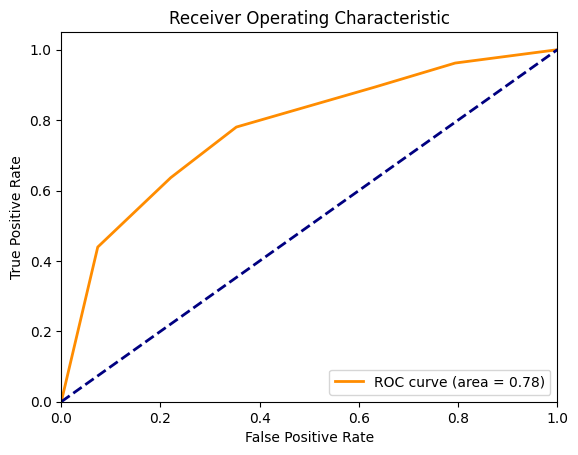

In [192]:
# Calcular a curva ROC
y3_prob = pipeline.predict_proba(X3_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y3_test, y3_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Após várias tentativas, os valores aproximados encontrados para o k foi de 17 e o n_neighbors de 6

In [193]:
# passar o knn para o documento amanhã